<a href="https://colab.research.google.com/github/sarimiro56/BigData_Python/blob/main/PBL%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC%EC%9A%A9_%EA%B3%BC%EC%A0%9C_202116029_%ED%83%9C%EC%9D%80%EC%84%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import sys

!sudo add-apt-repository ppa:saiarcot895/chromium-beta #실행 결과에서 Enter 입력
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser

!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

In [79]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

options = webdriver.ChromeOptions()
options.add_argument('--headless') #창이 나타나지 않도록 Headless 설정하기
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

webdriver_service = Service(executable_path=r'/usr/bin/chromedriver')
driver = webdriver.Chrome(service = webdriver_service, options=options)
url = 'https://www.metacritic.com/movie/'
driver.get(url)

In [ ]:
columns = ['영화제목', '평점']
title = []
ratings = []
for i in range(1, 25):
  title.append(driver.find_element(By.CSS_SELECTOR, '#__layout > div > div.c-layoutDefault_page > div.c-pageFrontDoorMovie > div:nth-child(5) > div > div.c-globalCarousel_fade-right > div > div:nth-child('+ str(i) +') > a > div.c-globalProductCardHorizontal_title > h3').text)
  ratings.append(driver.find_element(By.CSS_SELECTOR, '#__layout > div > div.c-layoutDefault_page > div.c-pageFrontDoorMovie > div:nth-child(5) > div > div.c-globalCarousel_fade-right > div > div:nth-child('+ str(i) +') > a > div.c-globalProductCardHorizontal_score.u-grid.g-text-xxxsmall > div > div > span').text)

In [ ]:
import pandas as pd
df = pd.DataFrame({columns[0]: title,
                   columns[1]: ratings}, columns = columns)
df.head(24)

,영화제목,평점
0,1. Roma,96
1,2. La La Land,94
2,3. Call Me by Your Name,94
3,4. The Irishman,94
4,5. Carol,94
5,6. Marriage Story,94
6,7. Sankofa,93
7,8. Time,91
8,9. Monty Python and the Holy Grail,91
9,10. Procession,90


In [ ]:
df.to_csv('NetFlix.csv', index = False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 로드
df1 = pd.read_csv('MovieStar.csv', encoding='utf-8')
df2 = pd.read_csv('MovieStar2.csv', encoding='utf-8')

# 두 데이터프레임 합치기
merged_df = pd.concat([df1, df2], keys=['Netflix', 'Hulu'])

# 데이터프레임의 처음 몇 행 표시
print(merged_df)

                    개봉일                                               영화제목  평점
Netflix 0  NOV 21, 2018                                               Roma  96
        1   DEC 9, 2016                                         La La Land  94
        2  NOV 20, 2015                                              Carol  94
        3  NOV 24, 2017                               Call Me by Your Name  94
        4   NOV 1, 2019                                       The Irishman  94
        5   NOV 6, 2019                                     Marriage Story  94
        6  MAY 28, 1993                                            Sankofa  93
        7  APR 14, 1975                    Monty Python and the Holy Grail  91
        8   OCT 9, 2020                                               Time  91
Hulu    0   MAR 5, 2021                                   Quo Vadis, Aida?  97
        1   JUL 2, 2021  Summer of Soul (...Or, When the Revolution Cou...  96
        2   DEC 6, 2019                         Port

In [ ]:
average_ratings_by_platform = merged_df.groupby(merged_df.index.get_level_values(0))['평점'].mean()
print("\n각 플랫폼에서의 영화 평균 평점:\n", average_ratings_by_platform)


각 플랫폼에서의 영화 평균 평점:
 Hulu       92.222222
Netflix    93.444444
Name: 평점, dtype: float64


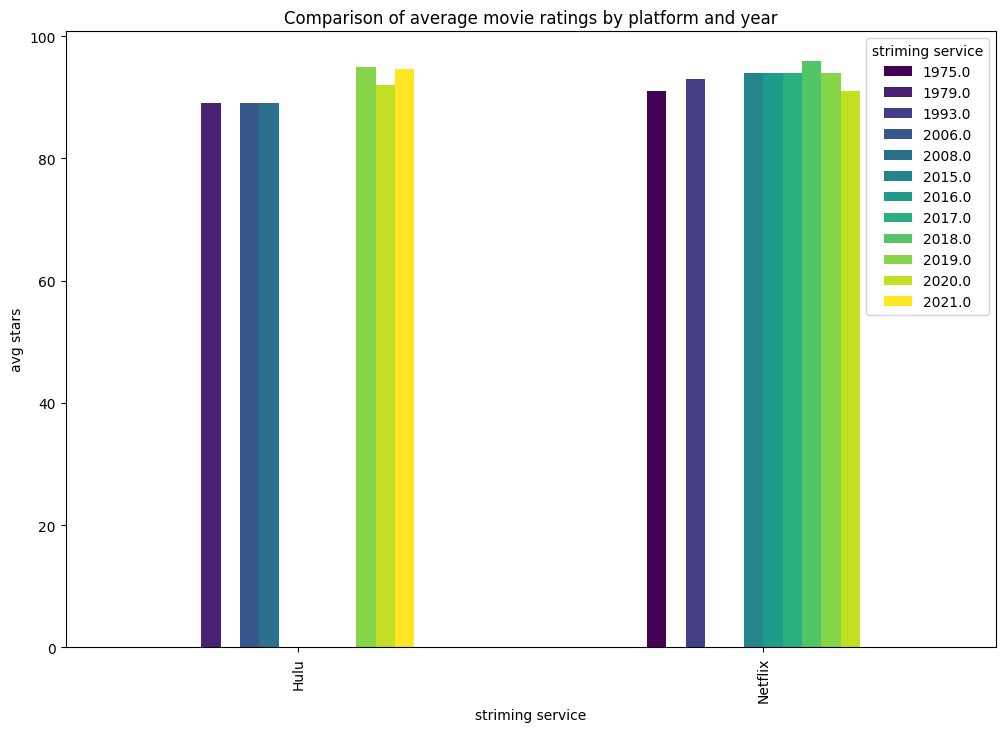

In [ ]:
# '플랫폼' 정보를 인덱스로 추가
df1['플랫폼'] = 'Netflix'
df2['플랫폼'] = 'Hulu'

# 두 데이터프레임 합치기
merged_df = pd.concat([df1, df2])

# 연도 정보를 추출하여 새로운 열 추가
merged_df['개봉연도'] = merged_df['개봉일'].str.extract('(\d{4})').astype(float)

# 플랫폼 및 연도별 영화 평균 평점 계산
average_ratings_by_platform_and_year = merged_df.groupby(['플랫폼', '개봉연도'])['평점'].mean().unstack()

# 시각화
average_ratings_by_platform_and_year.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Comparison of average movie ratings by platform and year')
plt.xlabel('striming service')
plt.ylabel('avg stars')
plt.legend(title='striming service')
plt.show()


In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 로드
df1 = pd.read_csv('NetFlix.csv', encoding='utf-8')

print(df1)

                               영화제목  평점           장르
0                              Roma  96        Drama
1                        La La Land  94       Comedy
2                      The Irishman  94    Biography
3              Call Me by Your Name  94        Drama
4                             Calor  94        Drama
5                    Marriage Story  94        Drama
6                           Sankofa  93        Drama
7                              Time  91    Biography
8   Monty Python and the Holy Grail  91    Adventure
9                        Procession  90  Documentary
10                   Phantom Thread  90        Drama
11             The Power of the Dog  89        Drama
12             Dick Johnson Is Dead  89  Documentary
13                         Time Out  88        Drama
14                         Shirkers  88  Documentary


           영화제목  평점         장르
0          Roma  96      Drama
1    La La Land  94     Comedy
2  The Irishman  94  Biography
               영화이름   평점      장르
0           Boyhood  100   Drama
1       Intolerance   99   Drama
2  Some Like It Hot   98  Comedy
                  영화이름   평점         장르
0   Lawrence of Arabia  100  Adventure
1           Casablanca  100      Drama
2  Fanny and Alexander  100      Drama


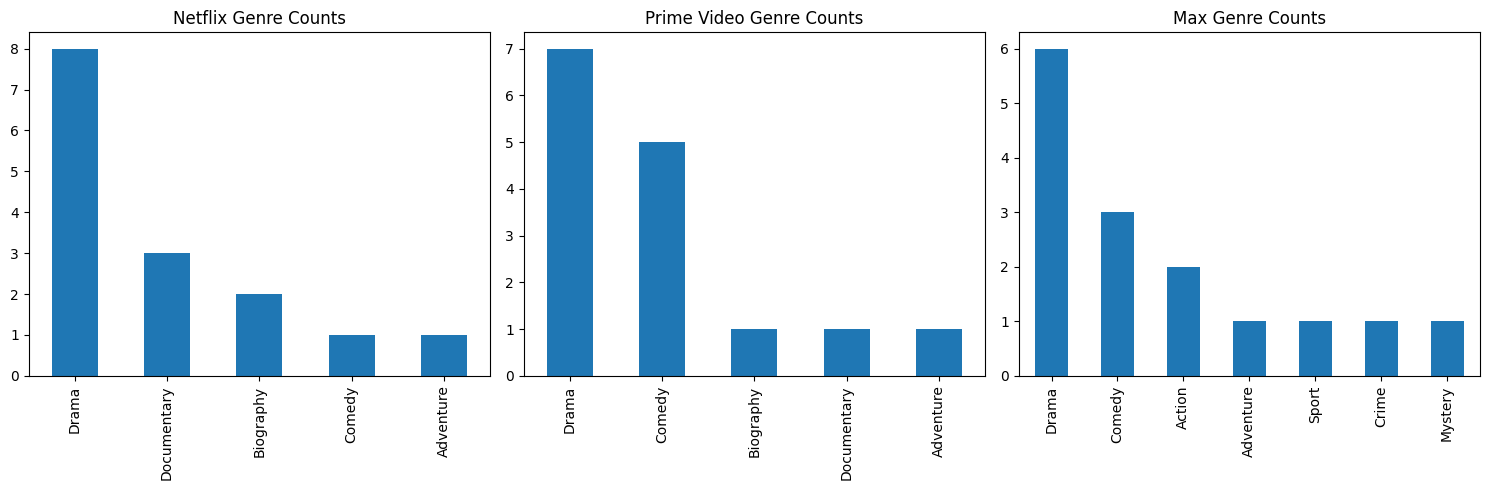

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 로드
netflix_df = pd.read_csv('NetFlix.csv', encoding='utf-8')
prime_video_df = pd.read_csv('Prime_Video.csv', encoding='utf-8')
max_df = pd.read_csv('Max.csv', encoding='utf-8')

# 각 플랫폼에서 1~3위 영화 선택
netflix_top_movies = netflix_df.sort_values(by='평점', ascending=False).head(3)
prime_video_top_movies = prime_video_df.sort_values(by='평점', ascending=False).head(3)
max_top_movies = max_df.sort_values(by='평점', ascending=False).head(3)

# 각 플랫폼에서 장르별 영화 개수 카운트
netflix_genre_counts = netflix_df['장르'].value_counts()
prime_video_genre_counts = prime_video_df['장르'].value_counts()
max_genre_counts = max_df['장르'].value_counts()

# 시각화: 각 플랫폼별 1~3위 영화
print(netflix_top_movies)
print(prime_video_top_movies)
print(max_top_movies)

# 시각화: 각 플랫폼별 장르별 영화 개수
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

netflix_genre_counts.plot(kind='bar', ax=axes[0], title='Netflix Genre Counts')
prime_video_genre_counts.plot(kind='bar', ax=axes[1], title='Prime Video Genre Counts')
max_genre_counts.plot(kind='bar', ax=axes[2], title='Max Genre Counts')

plt.tight_layout()
plt.show()
